# Ceneo Analyzer

# Biblioteki 

In [40]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Lista kodów wszystkich produktów, o których zostały pobrane opinie

In [41]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')], sep="\n")

94103927


# Kod produktu, dla którego ma zostać wykonana analiza opinii

In [42]:
product_id = input('Podaj kod produktu w serwisie Ceneo.pl: ')

# Wczytanie do obiektu pandas.DataFrame opinii o wskazanej produkcji

In [43]:
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions

,opinion_id,author,recomendation,rating,content,pros,cons,useful,useless,publish_date,purshare_date
0,13520374,b...2,Polecam,5/5,"Blender jest super, odkąd go kupiłam używam co...",[],[],2,0,2020-12-07 18:10:11,2020-11-01 19:40:50
1,15221712,s...3,Polecam,5/5,"Cicha praca, płynna i ergonomiczna regulacja o...",[],[],0,0,2021-11-17 22:44:34,2021-10-25 23:29:39
2,15725271,j...a,Polecam,5/5,"cichy ale mocny sprzęt w bardzo dobrej cenie, ...",[],[],0,0,2022-02-18 21:46:04,2022-02-03 09:29:33
3,17736379,m...t,Polecam,5/5,Blender super. Duża moc 21 stopni regulacji ob...,[],[],0,0,2023-07-24 21:52:41,2023-06-22 17:30:32
4,15798394,Chris,Polecam,5/5,"dużo bardzo dobrych gadżetów, dobra jakość wyk...",[],[],0,0,2022-03-09 11:48:12,2022-03-06 14:55:31
5,14495579,b...a,Polecam,"4,5/5",Jak na użytkowanie przez kikl dni to super. Po...,[],[],0,0,2021-05-21 17:57:30,2021-05-16 19:51:41
6,18073542,j...a,Polecam,"4,5/5",Blender o wielu funkcjach o dużej mocy przyjem...,[],[],0,0,2023-11-07 10:04:35,2023-10-17 11:12:01
7,15790669,k...2,Polecam,5/5,Produkt zgodny z opisem i dobrze wykonany Polecam,[],[],0,0,2022-03-07 21:17:02,2022-02-27 12:31:05
8,14590861,a...b,Polecam,5/5,"Dobrej jakości sprzęt,,łatwy w obsłudze.Polecam",[],[],0,0,2021-06-11 21:30:09,2021-05-22 08:15:58
9,13699872,s...1,Polecam,5/5,"Polecam. Mam taki w pracy, pracuje kucharzem.",[],[],0,0,2021-01-02 19:11:20,2020-12-02 18:02:26


# Przekształcanie danych

In [44]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split('/')[0].replace(',','.')).astype(float)

# Podstawowe statystyki


In [45]:
opinions_count = opinions.shape[0] # len(opinion) lub opinions.index.count
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

## Histogram częstości poszczególnych ocen w opiniach o produkcie

rating
0.0     0.0
0.5     0.0
1.0     0.0
1.5     0.0
2.0     0.0
2.5     0.0
3.0     0.0
3.5     0.0
4.0     1.0
4.5     7.0
5.0    30.0
Name: count, dtype: float64


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '30')]

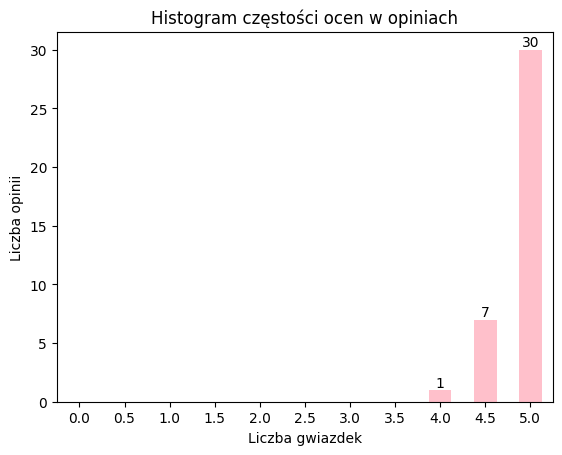

In [46]:
rating_distibution = opinions.rating.value_counts().reindex(np.arange(0, 5.5, 0.5), fill_value=0.0)
print(rating_distibution)
fig, ax = plt.subplots()
rating_distibution.plot.bar(color='pink')
plt.xticks(rotation=0)
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.title("Histogram częstości ocen w opiniach")
ax.bar_label(ax.containers[0], label_type ='edge', fmt= lambda x: int(x) if x > 0 else '')

# Udział poszczególnych rekomendacji w opiniach o produkcie

Text(0.5, 1.0, 'Odział rekomendacji w opiniach')

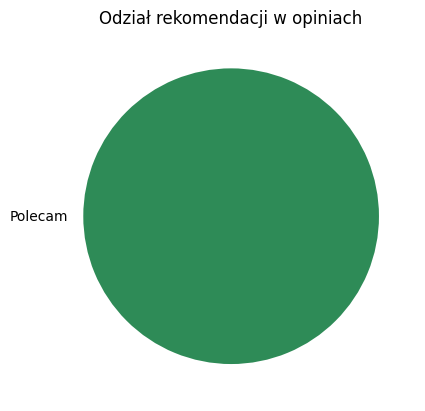

In [50]:
recomendation_distribution = opinions.recomendation.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recomendation_distribution
recomendation_distribution.plot.pie(
    label="",
    colors=["seagreen", "palevioletred", "thistle"],
    labels=["Polecam", "Nie polecam", "Nie mam zdania"]
)   
plt.title("Odział rekomendacji w opiniach")